In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Retrieve data
https://fbref.com

In [3]:
players = pd.read_csv("player_summary_stats.csv")
teams = pd.read_csv("team_summary_stats.csv")
players

,Player,#,Nation,Pos,Age,Min,Gls,Ast,PK,PKatt,...,Cmp,Att,Cmp%,PrgP,Carries,PrgC,Att.1,Succ,Team,Possession
0,El Bilal Touré,9.0,ml MLI,FW,21-146,88,1,0,0,0,...,13,18,72.2,0,7,3,1,1,Almería,0.28
1,Kaiky,2.0,br BRA,CB,19-045,2,0,0,0,0,...,0,0,NaN,0,0,0,0,0,Almería,0.28
2,Luis Javier Suárez,16.0,co COL,FW,25-086,75,0,1,0,0,...,14,15,93.3,2,15,1,2,1,Almería,0.28
3,Adri Embarba,10.0,es ESP,"LM,FW",30-295,15,0,0,0,0,...,3,4,75.0,0,6,2,1,0,Almería,0.28
4,Lucas Robertone,5.0,ar ARG,LM,25-345,75,0,0,0,0,...,15,23,65.2,5,16,1,5,2,Almería,0.28
5,Largie Ramazani,7.0,be BEL,"FW,LM",21-364,15,0,0,0,0,...,0,1,0.0,0,2,0,2,1,Almería,0.28
6,Íñigo Eguaras,4.0,es ESP,CM,30-356,82,0,0,0,0,...,18,25,72.0,3,12,1,0,0,Almería,0.28
7,Alejandro Pozo Pozo,17.0,es ESP,RM,24-004,8,0,0,0,0,...,0,0,NaN,0,1,0,1,0,Almería,0.28
8,César de la Hoz,6.0,es ESP,CM,30-333,90,0,0,0,0,...,8,19,42.1,1,7,0,1,1,Almería,0.28
9,Léo Baptistão,12.0,br BRA,RM,30-184,82,0,0,0,0,...,14,23,60.9,2,23,3,1,1,Almería,0.28


# 2. Team-level analysis
Let's start off with a simple offensive comparison.

[Text(0.5, 1.0, 'Shots per team'), Text(0, 0.5, 'Shots')]

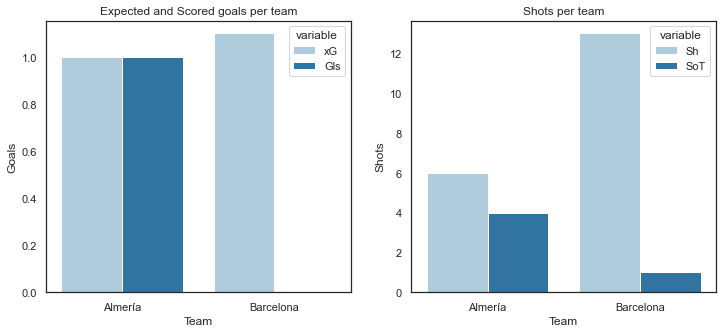

In [6]:
sns.set(rc={'figure.figsize':(10,6)})
sns.set_style(style='white')

fig, axes = plt.subplots(1, 2, figsize = (12, 5))

sns.barplot(
    ax = axes[0],
    x='Team', 
    y='value', 
    hue='variable', 
    data=teams[['xG', 'Gls', 'Team']].melt(id_vars='Team'),
    palette = sns.color_palette("Paired")
).set(title='Expected and Scored goals per team', ylabel='Goals')

sns.barplot(
    ax = axes[1],
    x='Team', 
    y='value', 
    hue='variable', 
    data=teams[['Sh', 'SoT', 'Team']].melt(id_vars='Team'),
    palette = sns.color_palette("Paired")
).set(title='Shots per team', ylabel='Shots')


Barça had more than twice as many shots, but they were extremely inefficient and ineffective. Almeria managed to shoot on target 67% of the time, while FCB just 8% (which translates to only one shot on target). 

This is obvious but, the amount of overal shots really doesn't matter. What matters really is shots on target, those are the ones that can end up being goal. And Almeria did better on this stat, that's maybe why they were able to score a goal and Barça not.

The next obvious question is: what about defense? Was Almeria's defense the cause of the poor number of Barça's shots on target?

[Text(0.5, 1.0, 'Defensive stats per team')]

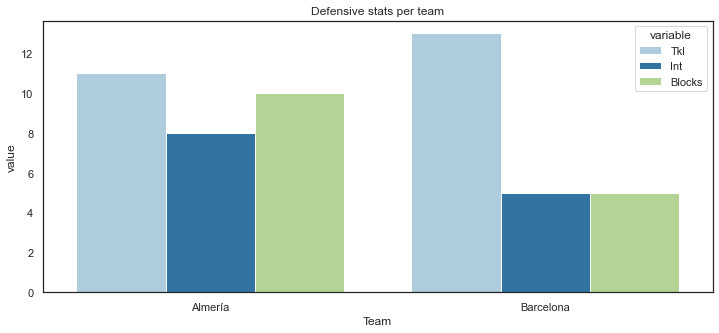

In [14]:
sns.set(rc={'figure.figsize':(12,5)})
sns.set_style(style='white')

sns.barplot(
    x='Team', 
    y='value', 
    hue='variable', 
    data=teams[['Tkl', 'Int', 'Blocks', 'Team']].melt(id_vars='Team'),
    palette = sns.color_palette("Paired")
).set(title='Defensive stats per team')


Well, Almeria had more interceptions and blocks but not tackles. How does this translate to plain English? We've seen Barça shot a lot but only one of those shots was on target. This seems to be partially caused by the large number of blocks the Almeria players performed.

About interceptions, my guess is that, during the second half, Barça wanted to score desperately. This caused them to start crossing balls and Almeria managed to refuse a lot of those before being finished off (it would have counted as block otherwise).

When it comes to tackles, we're already used to see a team putting a high pressure on the other team trying to steal the ball as soon as possible. This is done through tackles and that's my hypothesis why they have a better record here.

Seeing these stats, one would believe Barcelona had more control of the ball: they shot quite a lot and Almeria had more defensive interventions. Let's see that:

[Text(0.5, 1.0, 'With-the-ball stats per team')]

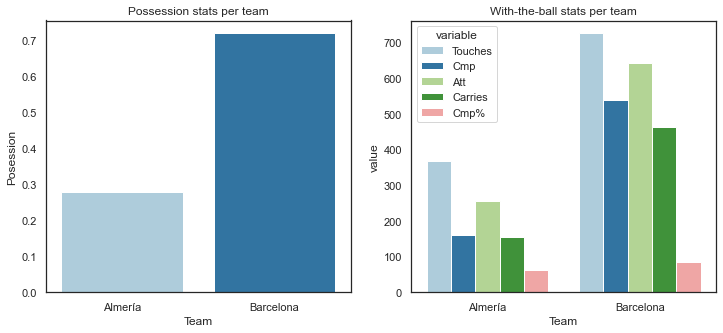

In [15]:
fig, axes = plt.subplots(1, 2, figsize = (12, 5))

sns.barplot(
    ax = axes[0],
    x='Team', 
    y='value', 
    data=teams[[
        'Possession', 'Team'
    ]].melt(id_vars='Team'),
    palette = sns.color_palette("Paired")
).set(title='Possession stats per team', ylabel = 'Posession')

sns.barplot(
    ax = axes[1],
    x='Team',
    y='value', 
    hue='variable', 
    data=teams[[
        'Touches', 'Cmp', 'Att', 'Carries', 'Cmp%', 'Team'
    ]].melt(id_vars='Team'),
    palette = sns.color_palette("Paired")
).set(title='With-the-ball stats per team')


It's a 30-70% split in possession. This is huge. Losing having had the ball 70% of the time is painful, and even unacceptable for a team like Barça. This is pure inefficacy and inefficiency.

When it comes to with-the-ball stats, Barça was better in all aspects. And the difference is still huge here, which is normal given the difference in possession percentage.

For now, we can draw our first conclusions:
- Barça was extremely ineffective and inefficient. They had all they needed to score: shots and possession, but they weren't able to do so because shots didn't hit the target.

The next question that goes through my mind is: why couldn't they score a goal? It brings me to think Pedri and Dembélé could have been the key, but they were injured. So let's inspect how these two, which I consider the most influential players in today's Barça, affected the previous games.

# 3. Games without Pedri and Dembélé


In [8]:
injured = pd.read_csv("pedri_dembele.csv")
pedri = injured['Pedri'].dropna().tolist()
dembele = injured['Ousmane Dembélé'].dropna().tolist()

# ===============================

fcb = pd.read_csv("fcb.csv")

for match in pd.unique(fcb['Match']):
    fcb.loc[
        (fcb['Team'] == 'Barcelona') & (fcb['Match'] == match), 'GlsA'
    ] = \
    fcb.loc[
        (fcb['Team'] != 'Barcelona') & (fcb['Match'] == match), 'Gls'
    ].values[0]
    
fcb = fcb.loc[fcb['Team'] == 'Barcelona', ['Match', 'Sh', 'SoT', 'Tkl', 'Int', 'Gls', 'GlsA', 'Possession']]

def create_result(x):
    if x['Gls'] > x['GlsA']:
        return 'W'
    elif x['Gls'] < x['GlsA']:
        return 'L'
    else:
        return 'D'
    
    
fcb['Res'] = fcb.apply(create_result, axis = 1)

[Text(0.5, 1.0, "Both's influence on results"),
 Text(0.5, 0, ''),
 Text(0, 0.5, '')]

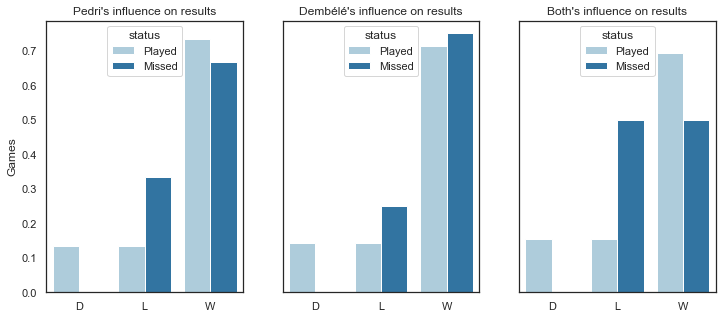

In [9]:
# Creating dfs
pedri_fcb = fcb[fcb['Match'].isin(pedri)]
not_pedri_fcb = fcb[~fcb['Match'].isin(pedri)]

dembele_fcb = fcb[fcb['Match'].isin(dembele)]
not_dembele_fcb = fcb[~fcb['Match'].isin(dembele)]

missed = fcb[(~fcb['Match'].isin(pedri)) & (~fcb['Match'].isin(dembele))]
played = fcb[(fcb['Match'].isin(pedri)) & (fcb['Match'].isin(dembele))]


fig, axes = plt.subplots(1, 3, figsize = (12, 5), sharey=True)

# 1. Pedri
pedri_res = pedri_fcb.groupby('Res').count().reset_index()[['Res', 'Match']]
not_pedri_res = not_pedri_fcb.groupby('Res').count().reset_index()[['Res', 'Match']]

pedri_res['status'] = 'Played'
not_pedri_res['status'] = 'Missed'

pedri_res['Match'] = pedri_res['Match']/pedri_res['Match'].sum()
not_pedri_res['Match'] = not_pedri_res['Match']/not_pedri_res['Match'].sum()

pedri_res = pd.concat([pedri_res, not_pedri_res])

# 2. Dembele
dembele_res = dembele_fcb.groupby('Res').count().reset_index()[['Res', 'Match']]
not_dembele_res = not_dembele_fcb.groupby('Res').count().reset_index()[['Res', 'Match']]

dembele_res['status'] = 'Played'
not_dembele_res['status'] = 'Missed'

dembele_res['Match'] = dembele_res['Match']/dembele_res['Match'].sum()
not_dembele_res['Match'] = not_dembele_res['Match']/not_dembele_res['Match'].sum()

dembele_res = pd.concat([dembele_res, not_dembele_res])

# 2. Both together
both_played = played.groupby('Res').count().reset_index()[['Res', 'Match']]
both_missed = missed.groupby('Res').count().reset_index()[['Res', 'Match']]

both_played['status'] = 'Played'
both_missed['status'] = 'Missed'

both_played['Match'] = both_played['Match']/both_played['Match'].sum()
both_missed['Match'] = both_missed['Match']/both_missed['Match'].sum()

both_played = pd.concat([both_played, both_missed])

sns.barplot(
    ax = axes[0],
    x=pedri_res.Res, 
    y=pedri_res.Match,
    hue = pedri_res.status,
    palette = sns.color_palette("Paired")
).set(title="Pedri's influence on results", xlabel=None, ylabel='Games')


sns.barplot(
    ax = axes[1],
    x=dembele_res.Res, 
    y=dembele_res.Match,
    hue = dembele_res.status,
    palette = sns.color_palette("Paired")
).set(title="Dembélé's influence on results", xlabel=None, ylabel=None)


sns.barplot(
    ax = axes[2],
    x=both_played.Res, 
    y=both_played.Match,
    hue = both_played.status,
    palette = sns.color_palette("Paired")
).set(title="Both's influence on results", xlabel=None, ylabel=None)

[Text(0.5, 1.0, "Dembélé's influence on defense"), Text(0.5, 0, '')]

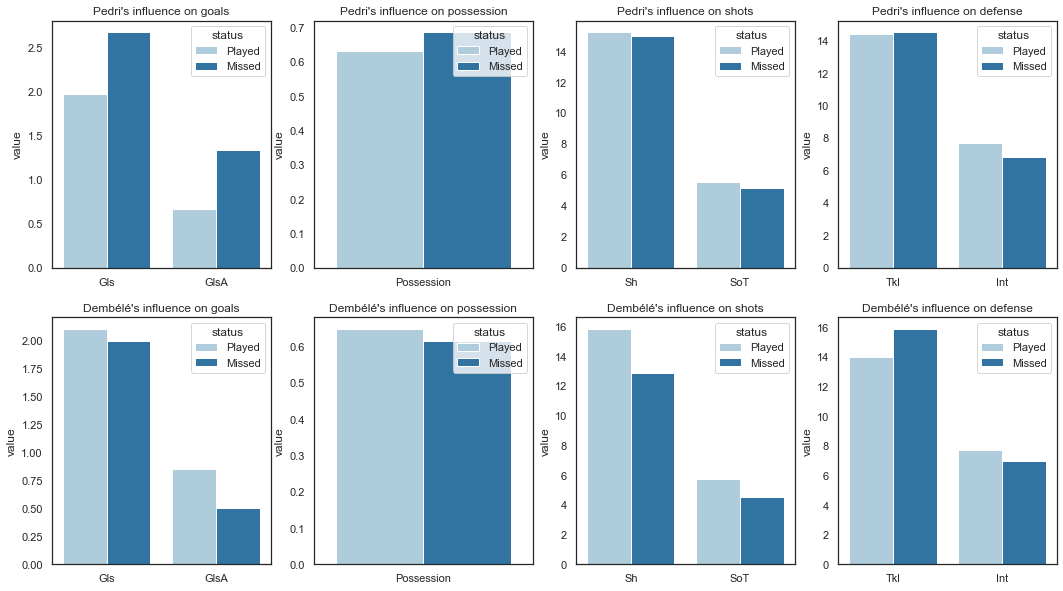

In [10]:
fig, axes = plt.subplots(2, 4, figsize=(18,10))

# 1. Gls and GlsA - Pedri
goals_p = pd.concat([
    pedri_fcb.mean()[['Gls', 'GlsA']].to_frame().transpose(), 
    not_pedri_fcb.mean()[['Gls', 'GlsA']].to_frame().transpose(), 
    #teams.iloc[1][['Gls', 'GlsA']].to_frame().transpose()
])
#goals['game'] = ['Avg', 'vs Almeria']
goals_p['status'] = ['Played', 'Missed']

# 2. Possession - Pedri
possession_p = pd.concat([
    pedri_fcb.mean()[['Possession']].to_frame().transpose(), 
    not_pedri_fcb.mean()[['Possession']].to_frame().transpose(), 
])
possession_p['status'] = ['Played', 'Missed']

# 3. Shots and Shots on Target - Pedri
shots_p = pd.concat([
    pedri_fcb.mean()[['Sh', 'SoT']].to_frame().transpose(), 
    not_pedri_fcb.mean()[['Sh', 'SoT']].to_frame().transpose(), 
])
shots_p['status'] = ['Played', 'Missed']

# 4. Defense (tackles and interceptions) - Pedri
defense_p = pd.concat([
    pedri_fcb.mean()[['Tkl', 'Int']].to_frame().transpose(), 
    not_pedri_fcb.mean()[['Tkl', 'Int']].to_frame().transpose(), 
])
defense_p['status'] = ['Played', 'Missed']


# 1. Gls and GlsA - Dembélé
goals_d = pd.concat([
    dembele_fcb.mean()[['Gls', 'GlsA']].to_frame().transpose(), 
    not_dembele_fcb.mean()[['Gls', 'GlsA']].to_frame().transpose(), 
    #teams.iloc[1][['Gls', 'GlsA']].to_frame().transpose()
])
#goals['game'] = ['Avg', 'vs Almeria']
goals_d['status'] = ['Played', 'Missed']

# 2. Possession - Dembélé
possession_d = pd.concat([
    dembele_fcb.mean()[['Possession']].to_frame().transpose(), 
    not_dembele_fcb.mean()[['Possession']].to_frame().transpose(), 
])
possession_d['status'] = ['Played', 'Missed']

# 3. Shots and Shots on Target - Dembélé
shots_d = pd.concat([
    dembele_fcb.mean()[['Sh', 'SoT']].to_frame().transpose(), 
    not_dembele_fcb.mean()[['Sh', 'SoT']].to_frame().transpose(), 
])
shots_d['status'] = ['Played', 'Missed']

# 4. Defense (tackles and interceptions) - Dembélé
defense_d = pd.concat([
    dembele_fcb.mean()[['Tkl', 'Int']].to_frame().transpose(), 
    not_dembele_fcb.mean()[['Tkl', 'Int']].to_frame().transpose(), 
])
defense_d['status'] = ['Played', 'Missed']


# Pedri plots
sns.barplot(
    ax = axes[0,0],
    x='variable', 
    y='value',
    data = goals_p.melt(id_vars='status'), # 'game'
    hue = 'status', #'game',
    palette = sns.color_palette("Paired")
).set(title="Pedri's influence on goals", xlabel=None)

sns.barplot(
    ax = axes[0,1],
    x='variable', 
    y='value',
    data = possession_p.melt(id_vars='status'), # 'game'
    hue = 'status', #'game',
    palette = sns.color_palette("Paired")
).set(title="Pedri's influence on possession", xlabel=None)

sns.barplot(
    ax = axes[0,2],
    x='variable', 
    y='value',
    data = shots_p.melt(id_vars='status'), # 'game'
    hue = 'status', #'game',
    palette = sns.color_palette("Paired")
).set(title="Pedri's influence on shots", xlabel=None)

sns.barplot(
    ax = axes[0,3],
    x='variable', 
    y='value',
    data = defense_p.melt(id_vars='status'), # 'game'
    hue = 'status', #'game',
    palette = sns.color_palette("Paired")
).set(title="Pedri's influence on defense", xlabel=None)

# Dembélé plots
sns.barplot(
    ax = axes[1,0],
    x='variable', 
    y='value',
    data = goals_d.melt(id_vars='status'), # 'game'
    hue = 'status', #'game',
    palette = sns.color_palette("Paired")
).set(title="Dembélé's influence on goals", xlabel=None)

sns.barplot(
    ax = axes[1,1],
    x='variable', 
    y='value',
    data = possession_d.melt(id_vars='status'), # 'game'
    hue = 'status', #'game',
    palette = sns.color_palette("Paired")
).set(title="Dembélé's influence on possession", xlabel=None)

sns.barplot(
    ax = axes[1,2],
    x='variable', 
    y='value',
    data = shots_d.melt(id_vars='status'), # 'game'
    hue = 'status', #'game',
    palette = sns.color_palette("Paired")
).set(title="Dembélé's influence on shots", xlabel=None)

sns.barplot(
    ax = axes[1,3],
    x='variable', 
    y='value',
    data = defense_d.melt(id_vars='status'), # 'game'
    hue = 'status', #'game',
    palette = sns.color_palette("Paired")
).set(title="Dembélé's influence on defense", xlabel=None)

Barça has scored more goals without Pedri but has also received more goals without him (we're talking about game averages here). Also, without him possession has been greater but the number of shots has decreased. Seeing this, I already understand why Pedri is so important for Barça: his profile is clearly offensive but he also controls the ball a lot, which causes Barça to ultimately have more chances. However, looking at the first chart, one would argue that FCB is more efficient without him. We could draw that cnoclusion but I think it's too brave given that he has only missed 6 games.

When it comes to Ousmane, he clearly influences the number of goals his team scores. It makes sense, he is a beast. Possession also rises when he's there, as well as shots, and these by a big difference. Defensively, Barça seems to have to defend more when he is not there. This could also be key.

[Text(0.5, 1.0, 'Influence on defense'), Text(0.5, 0, '')]

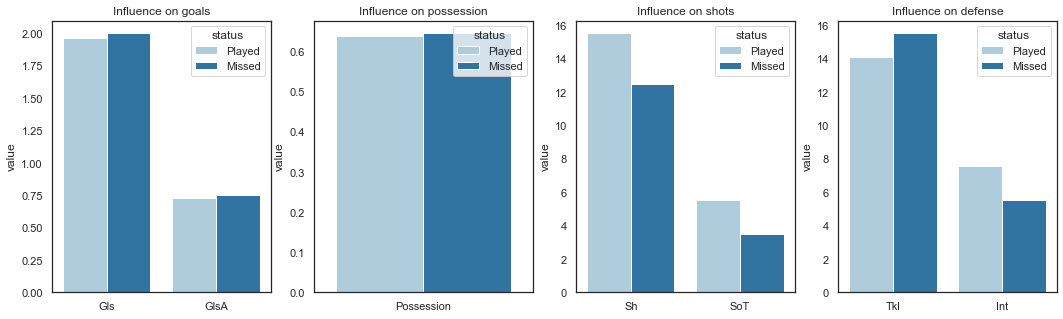

In [11]:
# Using them both together
fig, axes = plt.subplots(1, 4, figsize=(18,5))

# 1. Gls and GlsA
goals = pd.concat([
    played.mean()[['Gls', 'GlsA']].to_frame().transpose(), 
    missed.mean()[['Gls', 'GlsA']].to_frame().transpose()
])
goals['status'] = ['Played', 'Missed']

# 2. Possession
possession = pd.concat([
    played.mean()[['Possession']].to_frame().transpose(), 
    missed.mean()[['Possession']].to_frame().transpose(), 
])
possession['status'] = ['Played', 'Missed']

# 3. Shots and Shots on Target
shots = pd.concat([
    played.mean()[['Sh', 'SoT']].to_frame().transpose(), 
    missed.mean()[['Sh', 'SoT']].to_frame().transpose(), 
])
shots['status'] = ['Played', 'Missed']

# 4. Defense (tackles and interceptions)
defense = pd.concat([
    played.mean()[['Tkl', 'Int']].to_frame().transpose(), 
    missed.mean()[['Tkl', 'Int']].to_frame().transpose(), 
])
defense['status'] = ['Played', 'Missed']

# Plots
sns.barplot(
    ax = axes[0],
    x='variable', 
    y='value',
    data = goals.melt(id_vars='status'), # 'game'
    hue = 'status', #'game',
    palette = sns.color_palette("Paired")
).set(title="Influence on goals", xlabel=None)

sns.barplot(
    ax = axes[1],
    x='variable', 
    y='value',
    data = possession.melt(id_vars='status'), # 'game'
    hue = 'status', #'game',
    palette = sns.color_palette("Paired")
).set(title="Influence on possession", xlabel=None)

sns.barplot(
    ax = axes[2],
    x='variable', 
    y='value',
    data = shots.melt(id_vars='status'), # 'game'
    hue = 'status', #'game',
    palette = sns.color_palette("Paired")
).set(title="Influence on shots", xlabel=None)

sns.barplot(
    ax = axes[3],
    x='variable', 
    y='value',
    data = defense.melt(id_vars='status'), # 'game'
    hue = 'status', #'game',
    palette = sns.color_palette("Paired")
).set(title="Influence on defense", xlabel=None)

Conclusions from these charts:
- When Pedri and Dembouz play, the team sees a relevant increase in shots (and consequently, in shots on target as well). 
- However, more shots don't translate to more goals, it's the opposite really. But the difference here is minor.
- When it comes to possession, it's pretty much the same, around 65%, whether they play or not.
- Another interesting fact is the difference in interceptions and tackles. When they play they intercept the ball a lot more and the opposite holds true with tackles. This I think could be relevant because, in a given play, it's chronologically better to intercept the ball than to tackle, because by intercepting it you don't even give a choice to the opponent to attack, whereas a tackle comes after in a play.

# Players
I'll start by inspecting their defensive results. I'll sum the Tackles, Interceptions and Blocks per player to get an overall sense of their defensive performance.

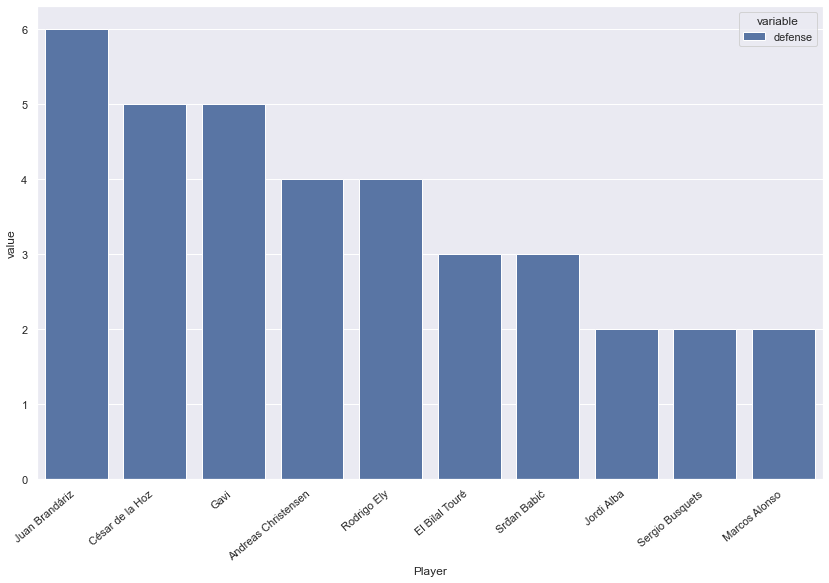

In [16]:
#palette=['red', 'blue']
sns.set(rc={'figure.figsize':(11.7,8.27)})
players['defense'] = players['Tkl'] + players['Int'] + players['Blocks']

tidy = players[['defense', 'Player']].sort_values('defense', ascending=False).head(10).melt(id_vars='Player')
ax = sns.barplot(x='Player', y='value', hue='variable', data=tidy)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

We have all sorts of players here. What I want to highlight is El Bilal Touré appearing as the top-6th defensive player. He is the guy who scored the goal, he is a forward player. This says a lot about Almeria's game: dafense and score on counterattacks.

As for the rest, all play in the defensive line except for de la Hoz, Gavi and Busquets.

Moving on to the attack now.

[Text(0, 0, 'El Bilal Touré'),
 Text(1, 0, 'Léo Baptistão'),
 Text(2, 0, 'Adri Embarba'),
 Text(3, 0, 'Ángel Alarcón'),
 Text(4, 0, 'Samu Costa')]

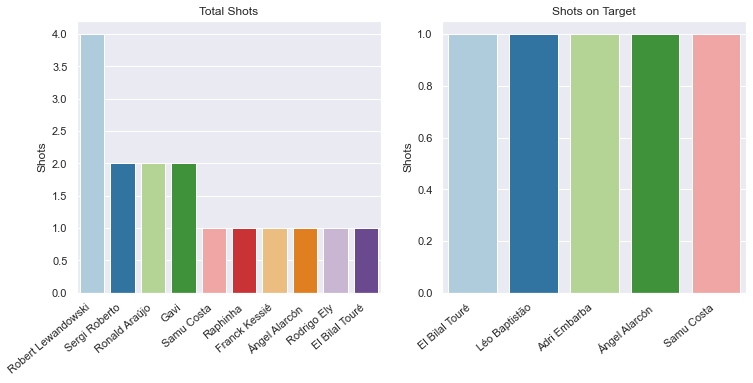

In [37]:
fig, axes = plt.subplots(1, 2, figsize = (12, 5))

sns.barplot(
    ax = axes[0],
    x='Player', 
    y='value', 
    data=players[['Sh', 'Player']].sort_values('Sh', ascending=False).head(10).melt(id_vars='Player'),
    palette = sns.color_palette("Paired")
).set(title='Total Shots', ylabel = 'Shots', xlabel=None)

axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=40, ha="right")

sns.barplot(
    ax = axes[1],
    x='Player',
    y='value', 
    data=players[['SoT', 'Player']].sort_values('SoT', ascending=False).head(5).melt(id_vars='Player'),
    palette = sns.color_palette("Paired")
).set(title='Shots on Target', ylabel = 'Shots', xlabel=None)

axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=40, ha="right")


This says a lot about the ineffectiveness I've been talking about. 7 out of the 10 players, ordered by number of shots, play in Barcelona. And only one of those could have a shot on target. Look at Lewandowski: 4 shots and none of them was even dangerous. Same with the others.

Whereas if we look at El Bilal Touré again, this guy really needs to get paid. He couldn't be more efficient. One shot and one goal.

[Text(0.5, 1.0, 'Defensive stats per team')]

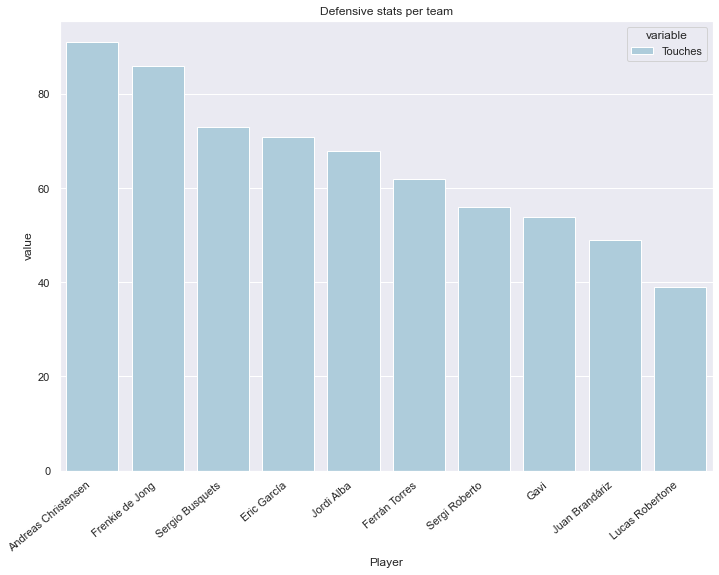

In [26]:
ax = sns.barplot(
    x='Player', 
    y='value', 
    hue='variable', 
    data=players[['Touches', 'Player']].sort_values('Touches', ascending=False).head(10).melt(id_vars='Player'),
    palette = sns.color_palette("Paired")
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(title='Defensive stats per team')

[Text(0.5, 1.0, 'Take-Ons'), Text(0.5, 0, '')]

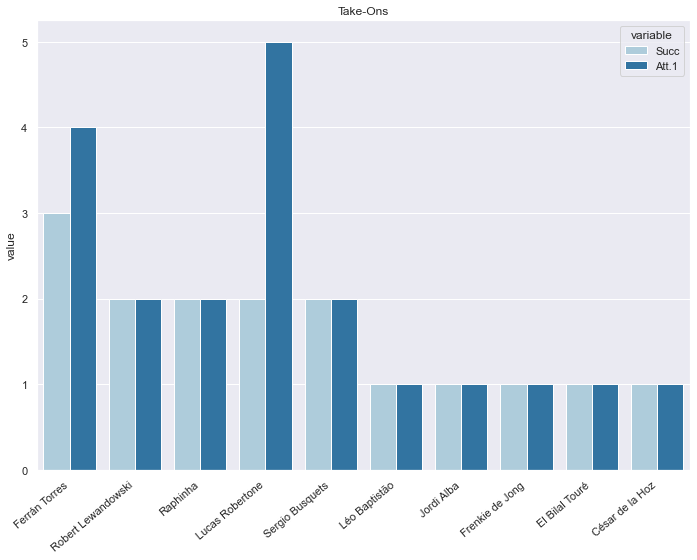

In [51]:
players['Take-Ons%'] = players['Succ']/players['Att.1']

ax = sns.barplot(
    x='Player', 
    y='value', 
    hue='variable', 
    data=players[['Succ', 'Att.1', 'Player']].sort_values('Succ', ascending=False).head(10).melt(id_vars='Player'),
    palette = sns.color_palette("Paired")
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(title='Take-Ons', xlabel=None)


[Text(0.5, 1.0, 'Shot-Creating Actions'), Text(0.5, 0, ''), Text(0, 0.5, '')]

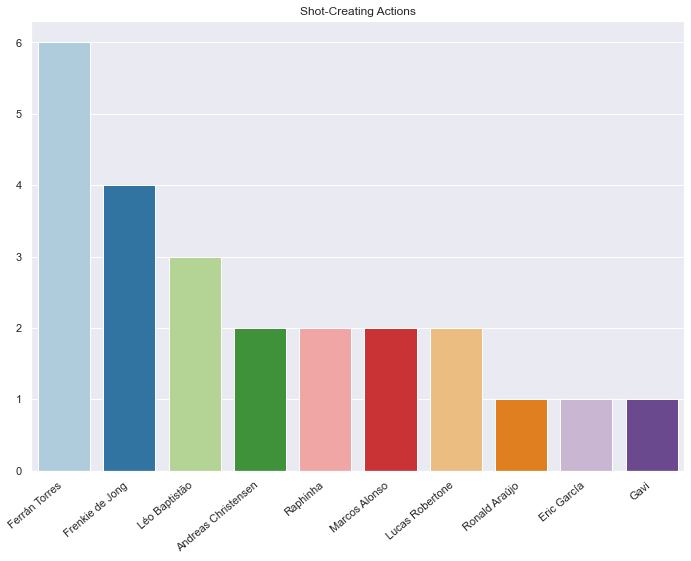

In [53]:
players['Take-Ons%'] = players['Succ']/players['Att.1']

ax = sns.barplot(
    x='Player', 
    y='value', 
    data=players[['SCA', 'Player']].sort_values('SCA', ascending=False).head(10).melt(id_vars='Player'),
    palette = sns.color_palette("Paired")
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(title='Shot-Creating Actions', xlabel=None, ylabel=None)
